In [46]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


    

<IPython.core.display.Javascript object>


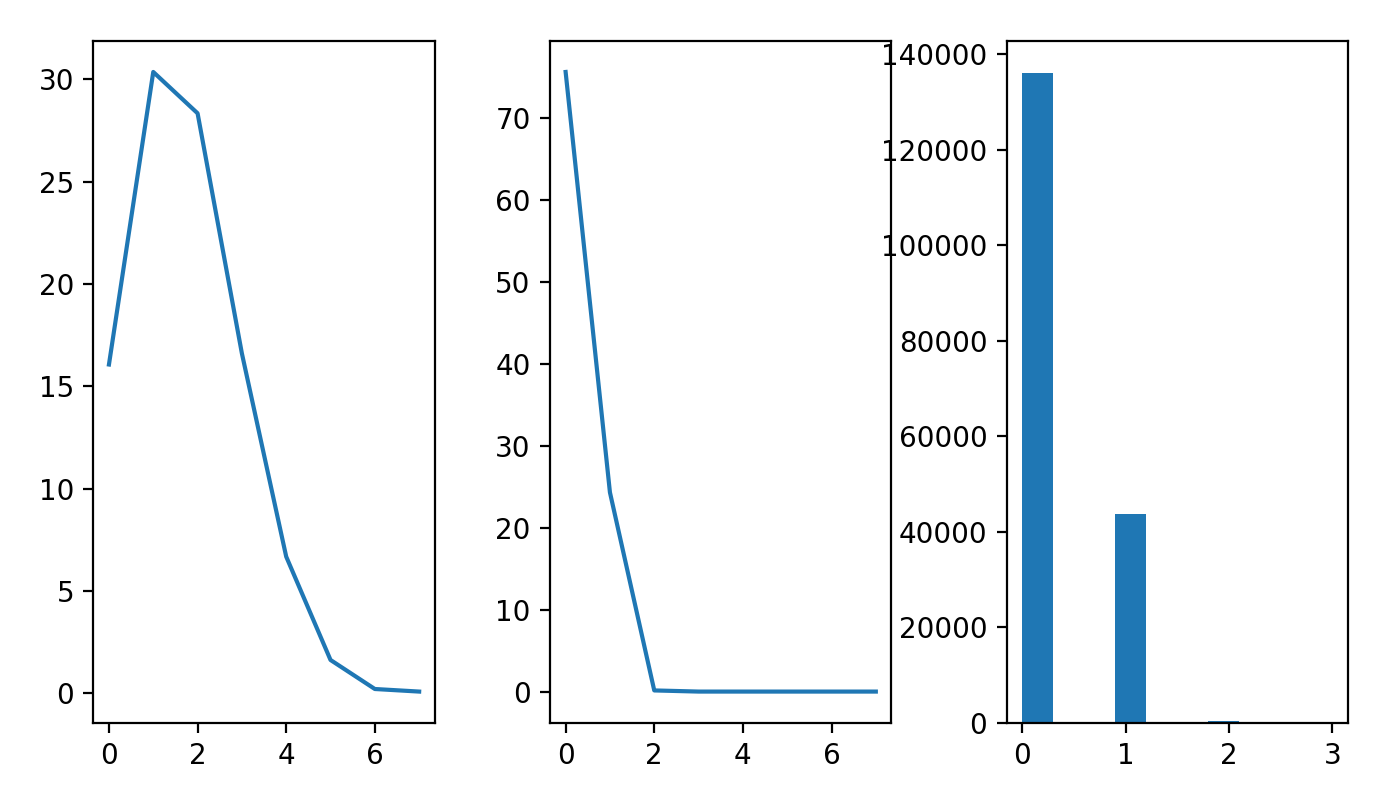

In [49]:

fig, axes = plt.subplots(nrows=1,ncols= 3 ,figsize=(7,4))
fig.tight_layout() 

for mouse in [130]:

    F=open("/Volumes/HENRI DD/playback"+str(mouse)+".txt",'r')


    data=F.readlines()
    F.close()


    hist=[0,0,0,0,0,0,0,0]
    histv=[0,0,0,0,0,0,0,0]
    v=[]

    for k in range(len(data)):
        data[k]=int(data[k][0])
        hist[data[k]]+=1
        if k>=1:
            #if abs(data[k]-data[k-1])!=0:
            histv[abs(data[k]-data[k-1])]+=1

            v.append(abs(data[k]-data[k-1]))
        
        
    for i in range(8):
        hist[i]/=len(data)/100
        histv[i]/=len(data)/100
    
    axes[0].plot(hist)
    axes[1].plot(range(0,8,1),histv[0:])
    axes[2].hist(v)
    

    
    
    
    

    



<IPython.core.display.Javascript object>


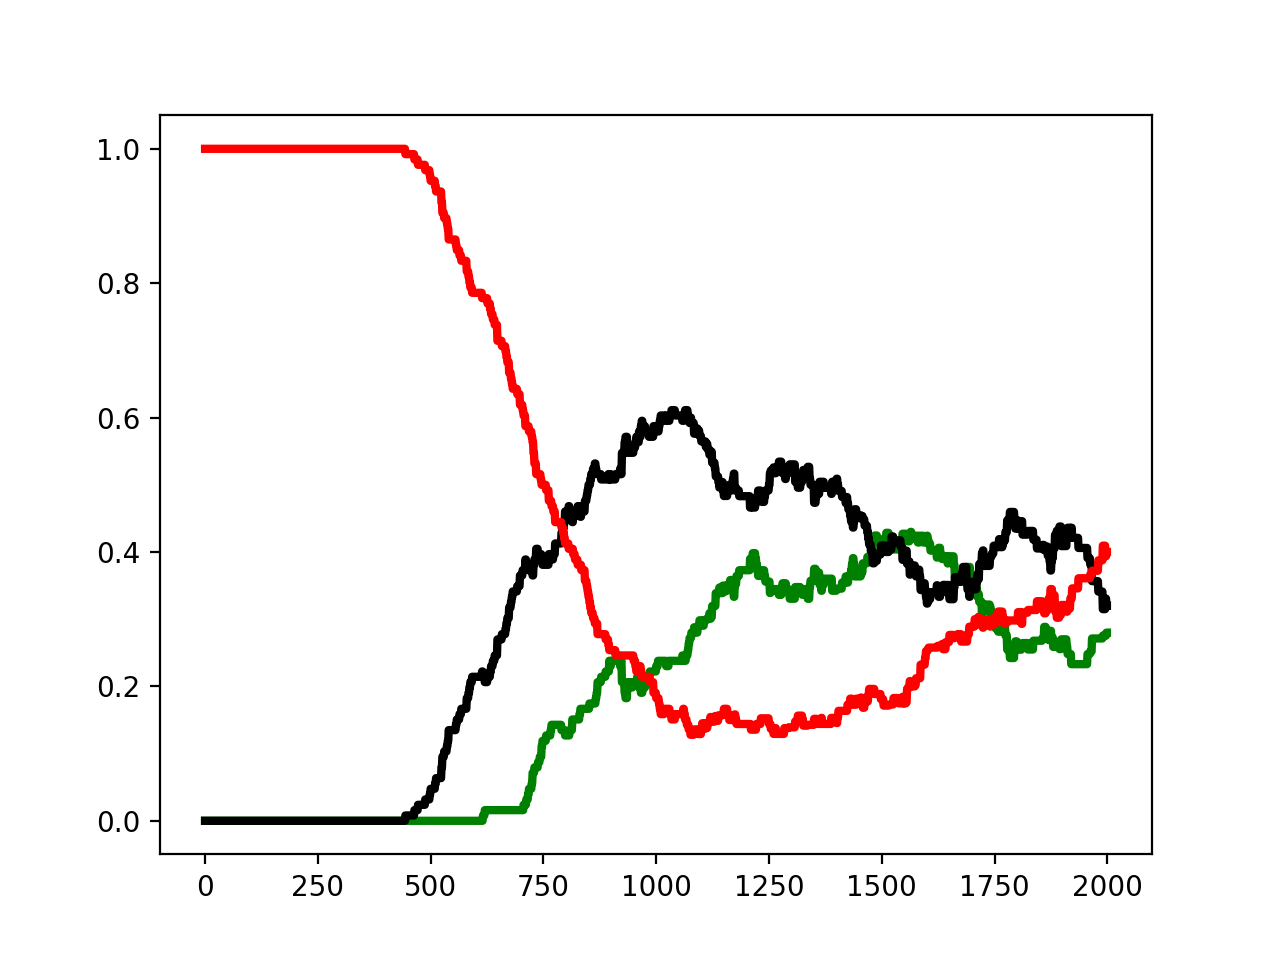

In [47]:
plt.figure()

nrew=[]
nbuf=[]
npun=[]
nall=[]
for time in range (20*100):
    nrew.append(0.0)
    nbuf.append(0.0)
    npun.append(0.0)
    nall.append(0.0)


for traj in trajectoriesD:
    for find in range(min(len(traj),20*100)):
        if 0<=traj[find]<=90:
            npun[find]+=1
        elif 270<=traj[find]<=359:
            npun[find]+=1
        elif 150<=traj[find]<=210:
            nrew[find]+=1
        else:
            nbuf[find]+=1
            
        nall[find]+=1
        
for time in range (20*100): 
    nrew[time]/=nall[time]
    nbuf[time]/=nall[time]
    npun[time]/=nall[time]
    
    
plt.plot(nrew, color="green", lw=3)
plt.plot(nbuf, color="black",lw=3)
plt.plot(npun,  color="red",lw=3)
            
        
        
    

<IPython.core.display.Javascript object>


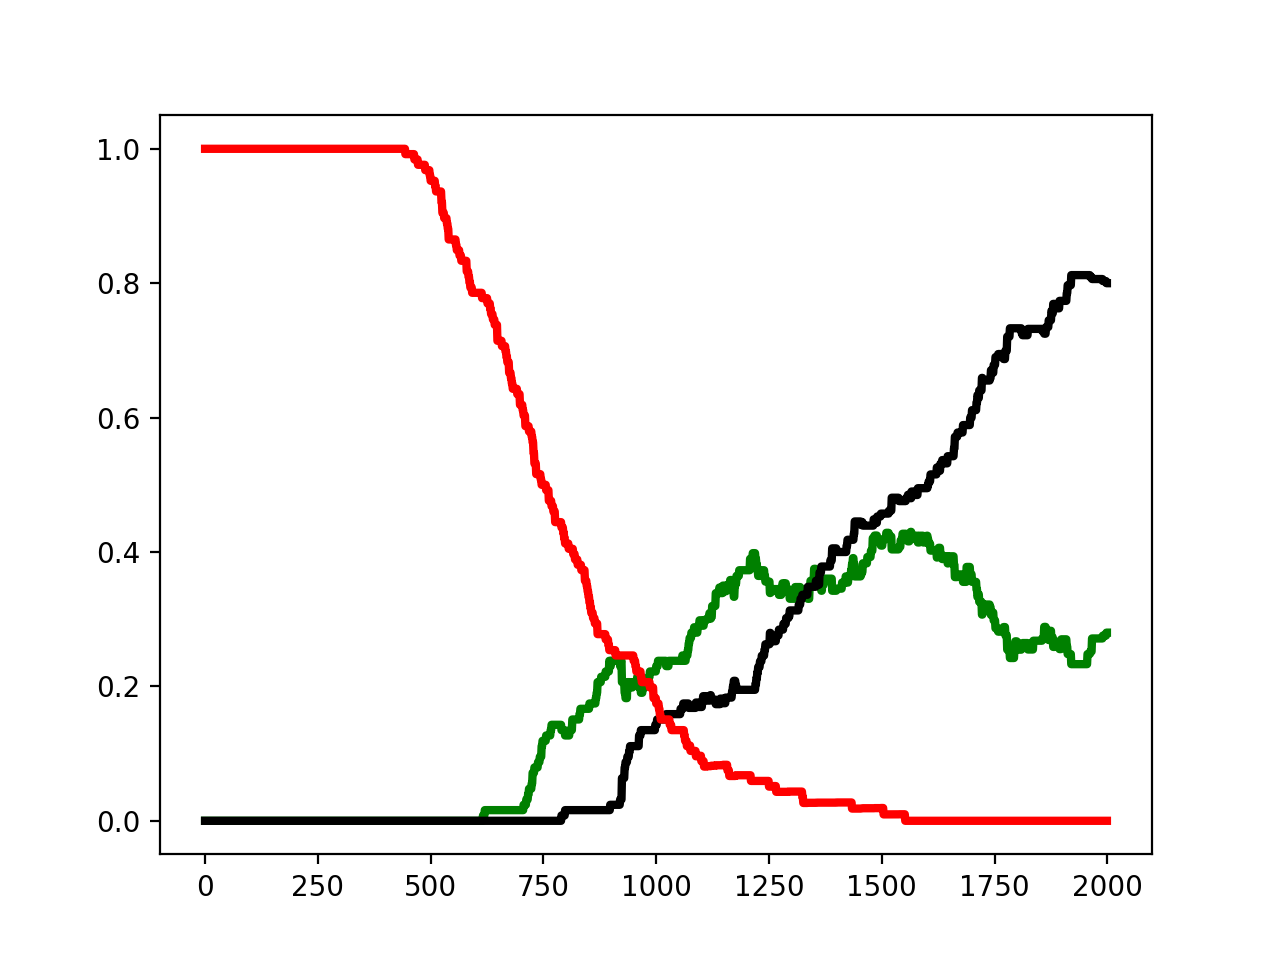

In [53]:
plt.figure()

#nrew=[]
npun2=[]
npun=[]
nall=[]
for time in range (20*100):
    npun2.append(0.0)
    npun.append(0.0)
    nall.append(0.0)


for traj in trajectoriesD:
    boolR=0
    for find in range(min(len(traj),20*100)):
        
        nall[find]+=1
        if boolR==0:
            if 0<=traj[find]<=90:
                npun2[find]+=1
            elif 270<=traj[find]<=359:
                npun2[find]+=1
        
        
        
        if 150<=traj[find]<=210 and boolR==0:
            boolR=1
            
        if boolR==1:
            #nrew[find]+=1
            
            if 0<=traj[find]<150:
                boolR=2
            elif 210<traj[find]<=359:
                boolR=2
                
        if boolR>1:
            npun[find]+=1
            
            
        
for time in range (20*100): 
    #nrew[time]/=nall[time]
    npun[time]/=nall[time]
    npun2[time]/=nall[time]
    
    
plt.plot(nrew, color="green", lw=3)
plt.plot(npun,  color="black",lw=3)
plt.plot(npun2,  color="red",lw=3)            
        
        
    

<IPython.core.display.Javascript object>


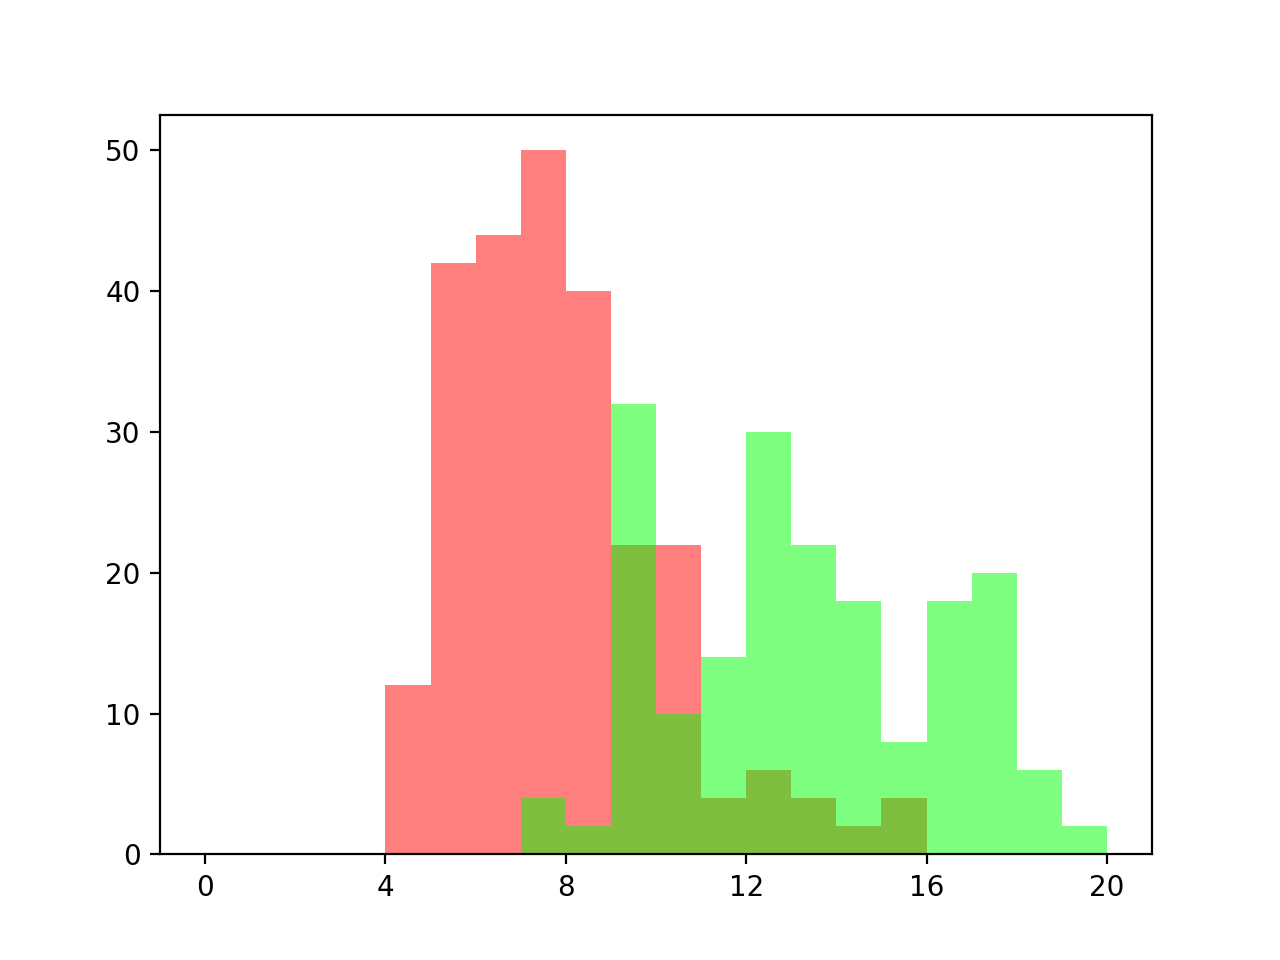

In [40]:
plt.figure()

plt.hist(valuesB,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],align='mid', color = [1,0,0,0.5])
plt.hist(valuesR2,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],align='mid', color = [0,1,0,0.5])
#plt.hist(valuesP,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],align='mid', color = [1,0,0,0.5])
plt.xticks([0,4,8,12,16,20])
plt.show()


In [ ]:
plt.figure()
Length=[]
for k in range (len(trajectoriesR)):
    Length.append(len(trajectoriesR[k]))
    
plt.hist(Length)
print(min(Length))
plt.show()

In [ ]:
plt.figure()
plt.hist(AllPos,bins=range(0,380,20),align='mid')
plt.xticks([0,90,150,210,270,360])
plt.yticks([50000])
plt.show()

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/Pos.pdf",orientation="portrait", dpi='figure')

In [5]:
import random
Absc_rew=[]
ord_dect=[]
color=[]

my_norm = matplotlib.colors.Normalize(0,2000) #this is how we will map our data
c1 = matplotlib.colors.LinearSegmentedColormap.from_list('mycm',['lightgrey','dimgrey'])

sd_waittime=394 #mean sd
instance=50

for mu_waittime in range(0,2000,10):
    
    
    
    Dist_waittime=np.random.randn(10000)*sd_waittime+mu_waittime

    
    rew=0.0
    dect=0.0
    lick=252*instance
    enter=0.0
    
    for k in range (instance):
        for traj_ind in range(len(trajectoriesD)):
        
        
            waittime=int(random.choice(Dist_waittime))
            
            if waittime<0:
                waittime=0
        
            stop=0
        
        
            if waittime>=(len(trajectoriesD[traj_ind])-1):
                enter+=1
            
            
            else:
                if trajectoriesD[traj_ind][waittime]<=90 or trajectoriesD[traj_ind][waittime]>=270:
                    stop=1
                    stop3=0
                
                    for time in range(0,waittime,1):
                    
                        if 150<trajectoriesD[traj_ind][time]<210:
                            if stop3==0:
                                enter+=1
                                stop3=1
                                #print(traj_ind)
                        
                        
            
                elif 150 < trajectoriesD[traj_ind][waittime] < 210:
                    enter+=1
                    dect+=1
                    rew+=1
                    stop=1
            
                elif 90<trajectoriesD[traj_ind][waittime]<=150 or 210 <=trajectoriesD[traj_ind][waittime]<270 :
                    stop2=0
                    for time in range(0,waittime,1):
                    
                        if 150<trajectoriesD[traj_ind][time]<210:
                            if stop2==0:
                                enter+=1
                                stop2=1
                            
                    for time in range(waittime,len(trajectoriesD[traj_ind]),1):    
                        if trajectoriesD[traj_ind][time]<=90 or trajectoriesD[traj_ind][time]>=270:
                            stop=1
                        
                        if 150<trajectoriesD[traj_ind][time]<210:
                            if stop==0:
                                enter+=1
                                dect+=1
                                rew+=1
                                stop=1
                            
                    
                        
                        
    Absc_rew.append((rew/lick)*100) 
    #print (rew)
    
    if enter!=0:
        ord_dect.append((dect/enter)*100)
    else:
        ord_dect.append(0)
        
    color.append(c1(my_norm(mu_waittime)))


        
                    
            
            
            
        
        
    
    

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
#print(Absc_rew)
#print(ord_dect)

perf=[67.74,27.27,33.07,53.10,53.40,7.25,71.43,33.33]
dect=[75,95,100,96.77,95,100,88.23,100]
plt.scatter(Absc_rew,ord_dect,c=color, marker='o', s=20)
plt.scatter(perf,dect,marker='o',s=40,color="darkblue")
plt.axis((0,105,0,105))
ax_cb = fig.add_axes([.35,.2,.5,.05,])
cb = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=c1, norm=my_norm, orientation = "horizontal")




plt.show()



In [10]:
# for each point, compute smallest distance
Distance=[]

for mouse in range (len(perf)):
    Distance.append(1000)
    for op_point in range(len(Absc_rew)):
        x1=Absc_rew[op_point]
        y1=ord_dect[op_point]
        x2=perf[mouse]
        y2=dect[mouse]
        dist=((x2-x1)**2+(y2-y1)**2)**(1/2)
        if dist<=Distance[mouse]:
            Distance[mouse]=dist
        
        
        
    

In [11]:
print(Distance)

[18.470934800757846, 8.421283603437987, 15.298767998652187, 21.27113414638124, 19.988161932468014, 5.162525539422687, 28.215798573011476, 15.432015290537327]


In [13]:
import scipy.stats as stat
print(stat.ttest_1samp(Distance,popmean=0))

Ttest_1sampResult(statistic=6.410589075773795, pvalue=0.00036360258658729244)


In [ ]:
plt.savefig("/Users/hlassagne/Desktop/AUCEasy.pdf",orientation="portrait", dpi='figure')

In [14]:
import random
Absc_rew=[]
ord_dect=[]
color=[]

sd_waittime=394 #mean sd
instance=50

my_norm = matplotlib.colors.Normalize(0,2000) #this is how we will map our data
c1 = matplotlib.colors.LinearSegmentedColormap.from_list('mycm',['lightgrey','dimgrey'])



for mu_waittime in range(0,2000,10):
    
    
    
    Dist_waittime=np.random.randn(10000)*sd_waittime+mu_waittime

    
    rew=0.0
    dect=0.0
    lick=252*instance
    enter=0.0
    
    for k in range (instance):
        for traj_ind in range(len(trajectoriesD)):
        
        
            waittime=int(random.choice(Dist_waittime))
            
            if waittime<0:
                waittime=0
        
            stop=0
        
        
            if waittime>=(len(trajectoriesD[traj_ind])-1):
                enter+=1
            
            
            else:
                if trajectoriesD[traj_ind][waittime]<=135 or trajectoriesD[traj_ind][waittime]>=225:
                    stop=1
                    stop3=0
                
                    for time in range(0,waittime,1):
                    
                        if 155<trajectoriesD[traj_ind][time]<205:
                            if stop3==0:
                                enter+=1
                                stop3=1
                                #print(traj_ind)
                        
                        
            
                elif 155 < trajectoriesD[traj_ind][waittime] < 205:
                    enter+=1
                    dect+=1
                    rew+=1
                    stop=1
            
                elif 135<trajectoriesD[traj_ind][waittime]<=155 or 205 <=trajectoriesD[traj_ind][waittime]<225 :
                    stop2=0
                    for time in range(0,waittime,1):
                    
                        if 155<trajectoriesD[traj_ind][time]<205:
                            if stop2==0:
                                enter+=1
                                stop2=1
                            
                    for time in range(waittime,len(trajectoriesD[traj_ind]),1):    
                        if trajectoriesD[traj_ind][time]<=135 or trajectoriesD[traj_ind][time]>=225:
                            stop=1
                        
                        if 155<trajectoriesD[traj_ind][time]<205:
                            if stop==0:
                                enter+=1
                                dect+=1
                                rew+=1
                                stop=1
                            
                    
                        
                        
    Absc_rew.append((rew/lick)*100) 
    #print (rew)
    
    if enter!=0:
        ord_dect.append((dect/enter)*100)
    else:
        ord_dect.append(0)
        
    color.append(c1(my_norm(mu_waittime)))

        
           
    #print (dect)
    #print (enter)
        
         

<IPython.core.display.Javascript object>


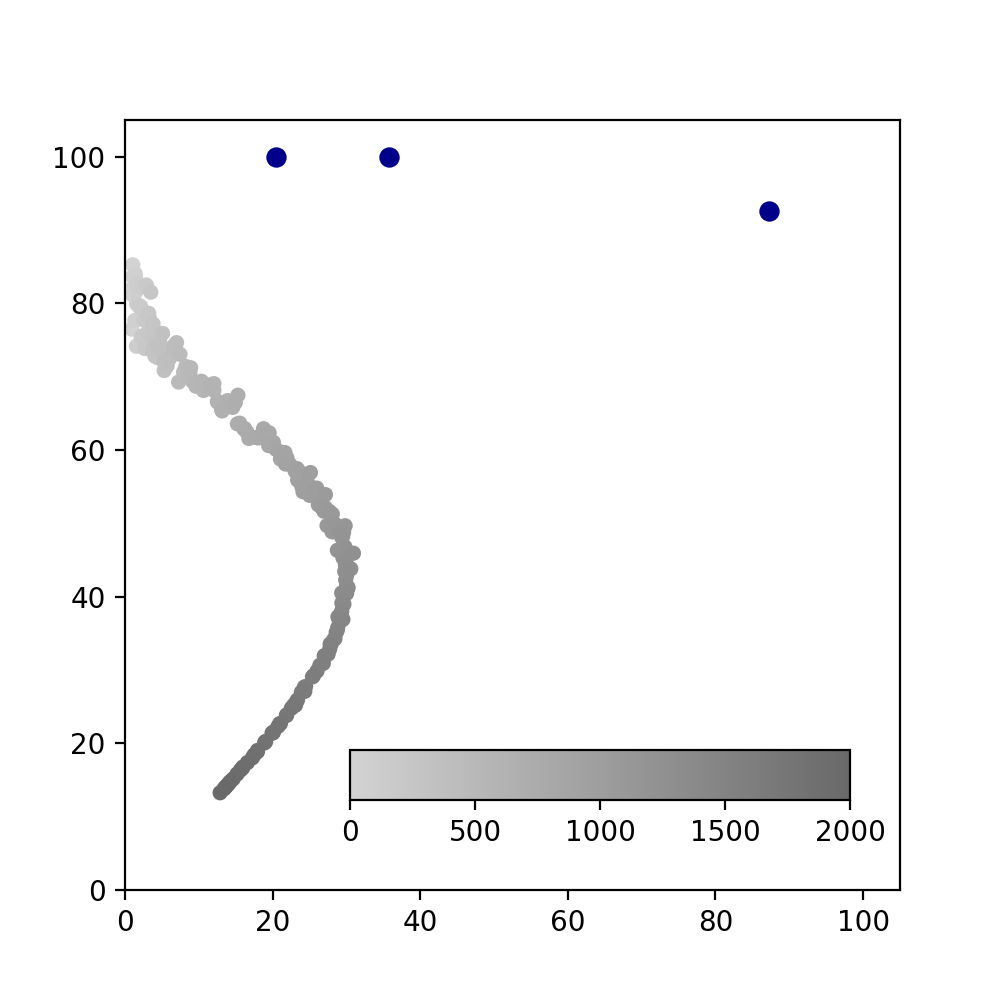

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
#print(Absc_rew)
#print(ord_dect)
perf=[87.21,20.51,35.71]
dect=[92.59,100,100]
plt.scatter(Absc_rew,ord_dect,c=color, marker='o', s=20)
plt.scatter(perf,dect,marker='o',s=40,color="darkblue")

plt.axis((0,105,0,105))
ax_cb = fig.add_axes([.35,.2,.5,.05,])
cb = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=c1, norm=my_norm, orientation = "horizontal")



plt.show()



In [16]:
# for each point, compute two smallest distance
Distance=[]

for mouse in range (len(perf)):
    Distance.append(1000)
    for op_point in range(len(Absc_rew)):
        x1=Absc_rew[op_point]
        y1=ord_dect[op_point]
        x2=perf[mouse]
        y2=dect[mouse]
        dist=((x2-x1)**2+(y2-y1)**2)**(1/2)
        if dist<=Distance[mouse]:
            Distance[mouse]=dist
            

    
        

In [19]:
print (Distance)

[71.42753261347396, 24.410015304568333, 37.13694947066911]


In [17]:
import scipy.stats as stat
print(stat.ttest_1samp(Distance,popmean=0))

Ttest_1sampResult(statistic=3.1569160892170482, pvalue=0.08738757721136482)


In [ ]:
plt.savefig("/Users/hlassagne/Desktop/AUChard.pdf",orientation="portrait", dpi='figure')

In [ ]:
#Smoothing the trajectories:

print(trajectoriesD[0][0:20])  


for traj_ind in range (len(trajectoriesD)):
    for frame_ind in range(len(trajectoriesD[traj_ind])-2):
        if trajectoriesD[traj_ind][frame_ind+1] != trajectoriesD[traj_ind][frame_ind]:
            diff=(trajectoriesD[traj_ind][frame_ind+1]-trajectoriesD[traj_ind][frame_ind])
            
            if diff==359:
                diff=-1
            if diff==-359:
                diff=1
                
            if diff==358:
                diff=-2
            if diff==-358:
                diff=2
            
            if diff==357:
                diff=-3
            if diff==-357:
                diff=3
            
            
            
            i=1
            
            while trajectoriesD[traj_ind][frame_ind-i] == trajectoriesD[traj_ind][frame_ind]:

                if frame_ind+1-i > 0:
                    i+=1
                else:
                    break
            smoothing_add=diff/(i)
            
            for j in range(i-1):
                
                trajectoriesD[traj_ind][frame_ind-j]+=(diff-smoothing_add*(j+1))
                
                if trajectoriesD[traj_ind][frame_ind-j]<0:
                    trajectoriesD[traj_ind][frame_ind-j]+=360
                    
                elif trajectoriesD[traj_ind][frame_ind-j]>359:
                    trajectoriesD[traj_ind][frame_ind-j]-=360

            


print(trajectoriesD[0][0:20])      
            
            
    

In [ ]:
#plt.savefig("/Users/hlassagne/Desktop/DelayReward.pdf",orientation="portrait", dpi='figure')

In [ ]:
plt.figure()
#plt.axhline(180,lw=len(reward_radians),color='chartreuse')   
#k=15
summ=0
dtraj=[]
colors=[]
print(trajectoriesD[3])
for k in range(len(trajectoriesD)):
    dtraj.append(np.diff(trajectoriesD[k]))
    j=0
    while j < len(dtraj[k])-1:
        if dtraj[k][j]>358:
            dtraj[k][j]-=360
        elif dtraj[k][j]<-358:
            dtraj[k][j]+=360


        j+=1
    if sum(dtraj[k])>0:
        colors.append("maroon")
    if sum(dtraj[k])<0:
        colors.append("seagreen")
       
        
    plt.plot(dtraj[k])
    plt.title("Trajectories")
    
    #plt.plot(trajectoriesD[k] ,color=colors[k],lw=0.6)
    
print("somme"+ str(summ) )   
#plt.axhline(punish_radians[150],lw=len(punish_radians),color='tomato')
#print(trajectories[0])



plt.show()

In [ ]:
plt.figure()


punish_degrees=range(210,510,1)
punish_radians = np.deg2rad(punish_degrees)
reward_degrees=range(150,210,1)
reward_radians = np.deg2rad(reward_degrees)

for k in range (len(trajectoriesR)):
    ax = plt.subplot(111, projection='polar')
    
    ax.plot(trajectoriesR[k],range(0,len(trajectoriesR[k])),lw=0.3,color="blue")
    
ax.set_theta_zero_location("S")
ax.bar(reward_radians[30],2000,width=2*np.pi/360.*len(reward_radians),color='chartreuse')   
#ax.bar(punish_radians[150],1000,width=2*np.pi/360.*len(punish_radians),color='tomato')
ax.set_rmax(2000)
ax.set_rorigin(-200)
ax.yaxis.set_major_formatter(plt.NullFormatter())
#ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_rticks([])
ax.set_xticks(np.pi/180. * np.linspace(0,  360 , 4 , endpoint=False))


plt.show()




<IPython.core.display.Javascript object>


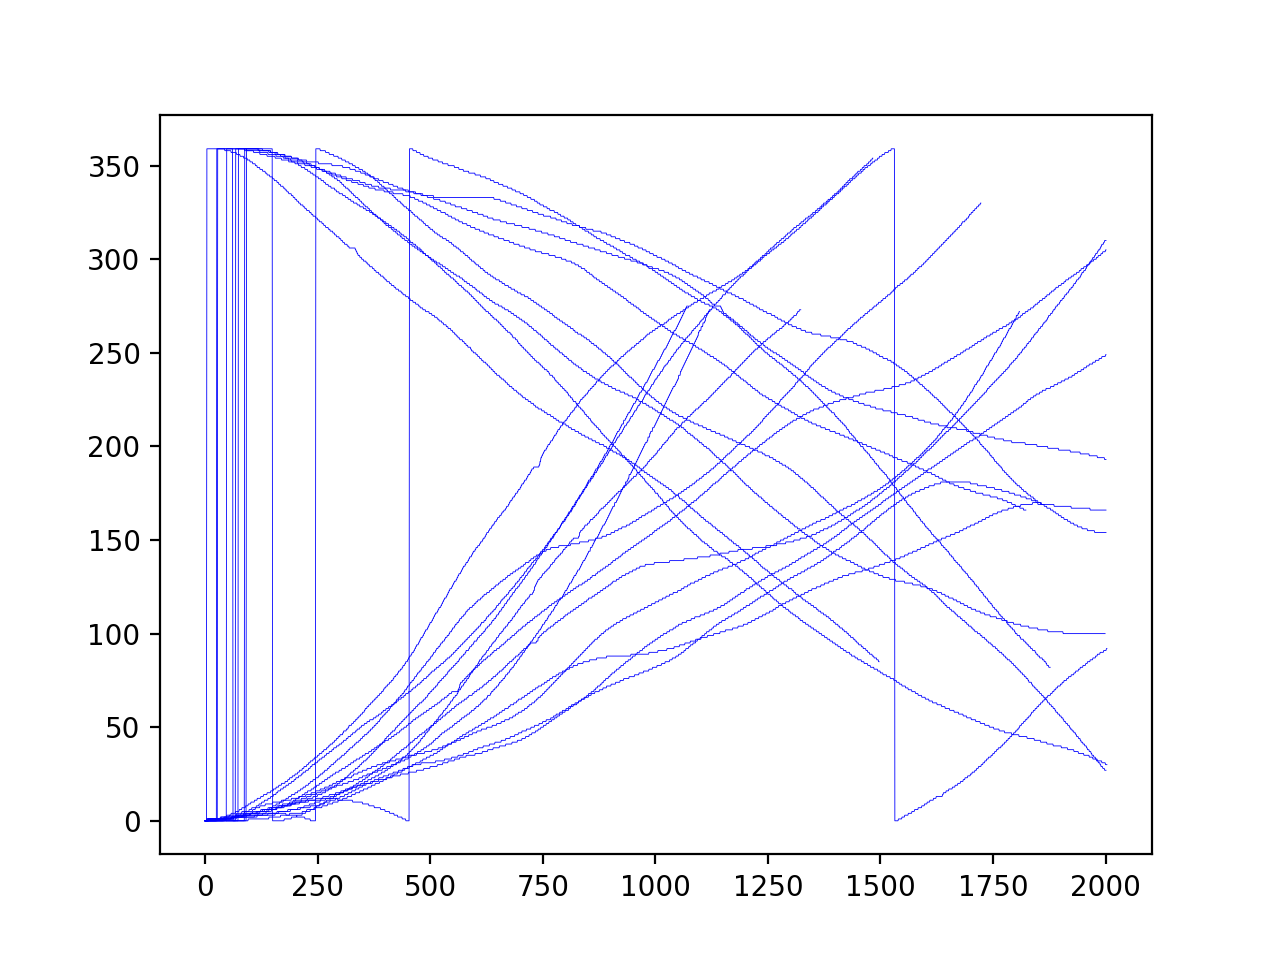

In [21]:
plt.figure()


punish_degrees=range(210,510,1)
punish_radians = np.deg2rad(punish_degrees)
reward_degrees=range(150,210,1)
reward_radians = np.deg2rad(reward_degrees)

for k in range(120,140,1):
    ax = plt.subplot()
    
    ax.plot(range(0,len(trajectoriesD[k])),trajectoriesD[k],lw=0.3,color="blue")
    
#ax.set_theta_zero_location("S")
#ax.bar(reward_radians[30],2000,width=2*np.pi/360.*len(reward_radians),color='chartreuse')   
#ax.bar(punish_radians[150],1000,width=2*np.pi/360.*len(punish_radians),color='tomato')
#ax.set_rmax(2000)
#ax.set_rorigin(-200)
#ax.yaxis.set_major_formatter(plt.NullFormatter())
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.set_rticks([])
#ax.set_xticks(np.pi/180. * np.linspace(0,  360 , 4 , endpoint=False))


plt.show()



In [17]:
plt.savefig("/Users/hlassagne/Desktop/Trajectories.pdf",orientation="portrait", dpi='figure')

In [ ]:
Speed=[]
Acc=[]
plt.figure(figsize=(8,8))

plt.subplot(1,1,1)
plt.title("Speed")
for k in range (len(dtraj)):
    Speed.append([])
    for j in range(len(dtraj[k])-50):
        Speed[k].append(sum(dtraj[k][j:j+50])*2)
    plt.plot(range(20,20+len(Speed[k]),1) ,Speed[k], lw=0.8,color=colors[k])

#plt.subplot(2,1,2)
#plt.title("Acceleration")
for k in range (len(Speed)):
    a=np.diff(Speed[k])
    Acc.append([])
    
    for j in range(len(a)-50):
        Acc[k].append(sum(a[j:j+50]))
        
    
    
    #plt.plot(range(20,20+len(Acc[k]),1) ,Acc[k], lw=0.8,color=colors[k])



    
plt.show()
        

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/Speed.pdf",orientation="portrait", dpi='figure')

In [ ]:
#Histograms 
plt.figure()
Average=[]
for k in range(len(Speed)):
    Average.append(np.mean(Speed[k]))
plt.hist(Average, bins=(-60,-55,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60))
plt.show()
                   
                   
    

In [ ]:
plt.savefig("/Users/hlassagne/Desktop/SpeedHist.pdf",orientation="portrait", dpi='figure')

In [ ]:
#fig, axes = plt.subplots(nrows=30,ncols= 1 ,figsize=(3,30))
#fig.tight_layout() 

#punish_degrees=range(270,450,1)
#punish_radians = np.deg2rad(punish_degrees)
#reward_degrees=range(155,205,1)
#reward_radians = np.deg2rad(reward_degrees)

#for k in range (30,60,1):
#    ax = plt.subplot(30,1,k+1-30, projection='polar')
#    print(k)
#    ax.plot(trajectories[k],range(0,len(trajectories[k])),color='black',lw=0.4)
#    
#    ax.set_theta_zero_location("S")
#    ax.bar(reward_radians[25],2000,width=2*np.pi/360.*len(reward_radians),color='chartreuse')   
#    ax.bar(punish_radians[90],2000,width=2*np.pi/360.*len(punish_radians),color='tomato')
#    ax.set_rmax(2000)

#plt.show()

In [ ]:
plt.figure(figsize=(3,4))

plt.bar(['clock','trigo'],height=Left_right, width=0.4)
print(Left_right)
plt.show()

In [ ]:
print(data[65])


In [ ]:
F=open("/Users/hlassagne/Documents/Henri/Playback.txt",'w')

F=open("/Users/hlassagne/Documents/Henri/Analysis/Analysis_code/SpyderCode/playback_trials_rewards.txt",'r')
data=F.readlines()
print(len(data))
F.close()
F=open("/Users/hlassagne/Documents/Henri/Playback.txt",'w')

for k in range(1,6,1):
    F.writelines(data[k])
    
for k in range(13,15,1):
    F.writelines(data[k])
F.writelines(data[30]) 

for k in range(60,65,1):
    F.writelines(data[k])
for k in range(66,82):
    F.writelines(data[k])
for k in range(82,90,1):
    F.writelines(data[k])
    
F.writelines(data[91])

for k in range(93,len(data),1):
    F.writelines(data[k])
    





In [ ]:
F=open("/Users/hlassagne/Documents/Henri/Playback2.txt",'w')
for trial_index in range(len(trajectoriesD)):
    for time_index in range(len(trajectoriesD[trial_index])):
        F.write(str(trajectoriesD[trial_index][time_index])+",")
    F.write("\n")

<IPython.core.display.Javascript object>


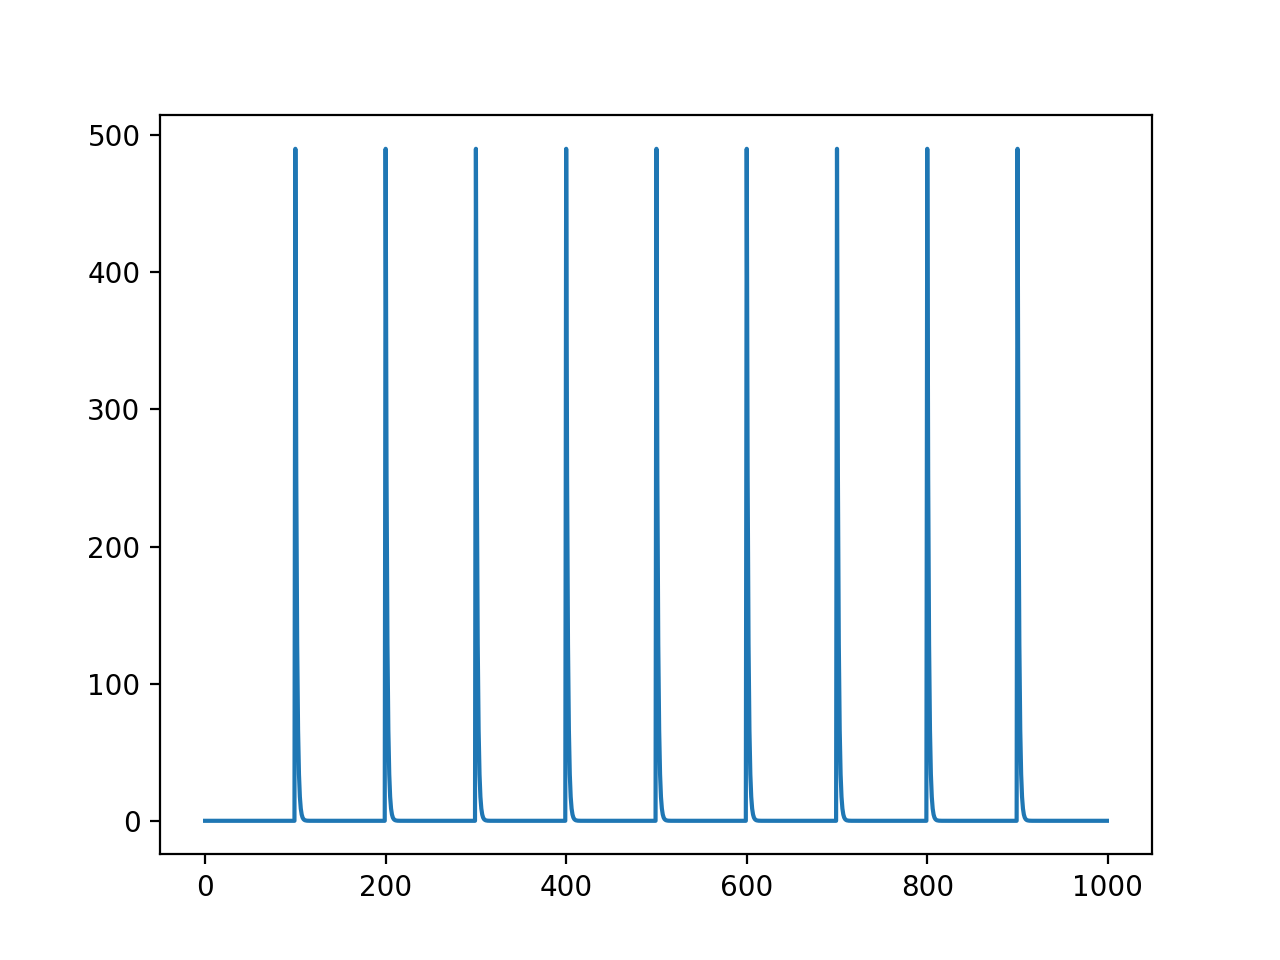

In [29]:
plt.figure()
t=range(1000)
a=[0]*1000
v=[0]
x=[0]
for k in range(1000):
    if k%100==0:
        a[k]+=490000

for k in range (1,1000,1):
    v.append(a[k]/1000 + v[k-1]/1.95)
    x.append(v[k]/1000 + x[k-1])
    
#print(v)
#print(x)

plt.plot(t,v)


plt.show()


<IPython.core.display.Javascript object>


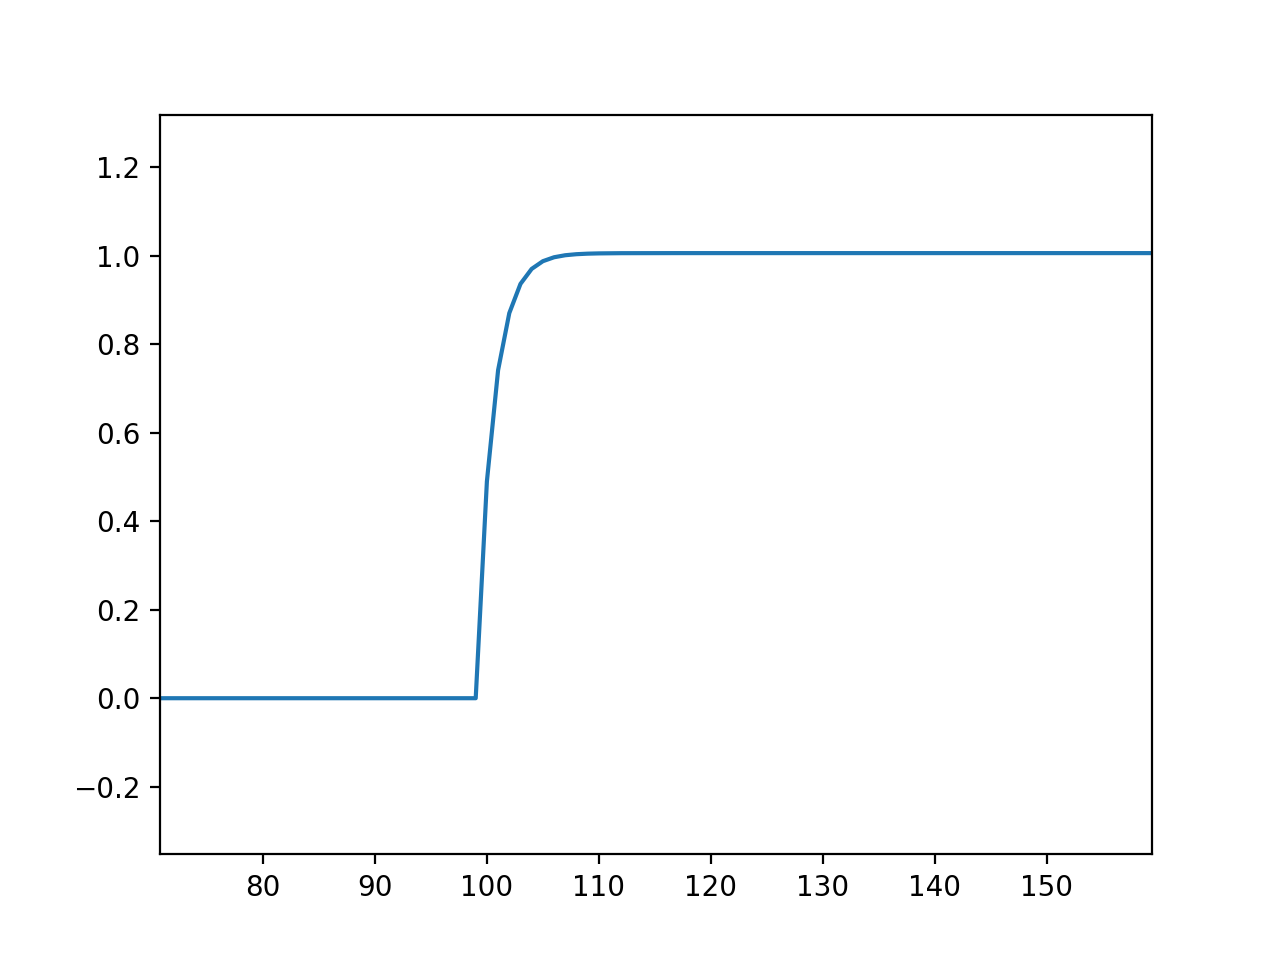

9.052105263157893


In [30]:
plt.figure()
plt.plot(t,x)
plt.show()
print(np.max(x))